# Machine Learning - Football Events
### Project 2

#### Authors : 
* Gustavo Torres, up201706473@fe.up.pt
* Joaquim Rodrigues, up201704844@fe.up.pt
* Miguel Rosa


## Abstract

This project aims to build predictive machine learning models, with focus on classifiers and apply them to a football dataset, with the use of supervised learning. Machine learning consist in the capability of machines recognize certain patterns in the data with being previously programmed. Predictive models allow to predict the certaing features about the data given an input. Football is a rather random competition where a team can win a match and right after lose against the exact same team in the same conditions. Combining the two of this is this project's objective, combine predictive machine learning models with the randomness of football and it's events, to be able to predict several features of football games and events.



## 1. Introduction

In the context of curricular unit IART, Inteligncia Artificial, of MIEIC, Mestrado Integrado em Informática e Computação, our group were asked to make a project about Machine Learning, being able to choose from several options  where we would like to focus on. The group decision was to work on a classification problem using supervised learning, where the goals is to learn and classify/predict several features about the data, given input features. There was suggestions about the dataset we could work on, and we choose to work in a dataset about football games and its events.

Supervised learning is a major branch of machine learning algorithms, possibly the most used as of the writing of this paper, where the model learns by example and from there it can predict, based on previous seen data, the output of new data. During the training the models is fed with input data and its associated output, learning and identifying complex patterns in the data and to what output it maps to, so it can predict unseen data.

Supervised learning can be divided into 2 categories: classification and regression. This paper focus majorly in classification where the models tries to correctly identify to which class/category the data maps to. One of the most used approches to classification consists od binary data, whether a feature is true or not, for example, whether a shoot is goal or not. In this paper, several classifier models are used, with particular emphasis on K-Nearest Neighbors, Suport Vector Machines, Random Forest Classifiers and Neural Networks. In regression the models tries to map the feature in a continuos space, and can be used to predict quantities or used in statistics.

The dataset choosen is about football because it is a theme our group is interested on and would make our analysis more meaningful. Football is possibly the most popular sport around the world and like many sports, it is inherently random, its result are very unpredictable and so its events, which make the sport so interesting to so many around the world, nevertheless it is the sport the most people bet on.

Firstly, an exploratory dataset analysis, including class distribuion, values range and class analysis, was made in order to know the information avaialble and get familiar with the data we would work on and to identify possible problems where we could apply supervised learning and predict features from the dataset.

After the problems have been choosen, a data preprocessing was made in order to select meaning and useful features for the problem we were trying to predict, from handling NULL values, standardizing data and even creating new tables to hold new processed information (data transform). Now it was possible to train our classifier models and compare its result against the test data, using several metrics and erros.

Finally graphs and tables were made to support the results and compare the models.


## 2. Dataset

The dataset choosen is about football games and its events, and can be accesed [here](https://www.kaggle.com/secareanualin/football-events). It is hard to find a good database about football games and event, containg so many and so detailed information. The information was parsed using a regex from the description of the event resulting in a total 18 features about each game and 22 about each event. Some features are dependent on other features so they only have a value associated dependeding on the value of other features, for exemple, the shot_outcome only has a value when the event_type is an attemp (value  = 1), otherwise it is NULL.

The dataset consisting of a total of 10112 games and 941009 events, during 5 years, from the season 2011/2012 to 2016/2017 of the 5 major european leagues, England, Spain, France, Germany, Italy.

There are two files, one with each of the available games, and other one with each of the major events of the previous games. Each game has a unique identifier that is shared with each event of that game, making it possible to map an event to a game and even joing data as needed.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import copy

%matplotlib inline

#load data from files
events = pd.read_csv('./data/' + 'events.csv')
ginf = pd.read_csv('./data/' + 'ginf.csv')

In [2]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941009 entries, 0 to 941008
Data columns (total 22 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id_odsp        941009 non-null  object 
 1   id_event       941009 non-null  object 
 2   sort_order     941009 non-null  int64  
 3   time           941009 non-null  int64  
 4   text           941009 non-null  object 
 5   event_type     941009 non-null  int64  
 6   event_type2    214293 non-null  float64
 7   side           941009 non-null  int64  
 8   event_team     941009 non-null  object 
 9   opponent       941009 non-null  object 
 10  player         880009 non-null  object 
 11  player2        291310 non-null  object 
 12  player_in      51715 non-null   object 
 13  player_out     51738 non-null   object 
 14  shot_place     227459 non-null  float64
 15  shot_outcome   228498 non-null  float64
 16  is_goal        941009 non-null  int64  
 17  location       467067 non-nul

In [3]:
ginf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10112 entries, 0 to 10111
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id_odsp    10112 non-null  object 
 1   link_odsp  10112 non-null  object 
 2   adv_stats  10112 non-null  bool   
 3   date       10112 non-null  object 
 4   league     10112 non-null  object 
 5   season     10112 non-null  int64  
 6   country    10112 non-null  object 
 7   ht         10112 non-null  object 
 8   at         10112 non-null  object 
 9   fthg       10112 non-null  int64  
 10  ftag       10112 non-null  int64  
 11  odd_h      10112 non-null  float64
 12  odd_d      10112 non-null  float64
 13  odd_a      10112 non-null  float64
 14  odd_over   977 non-null    float64
 15  odd_under  977 non-null    float64
 16  odd_bts    977 non-null    float64
 17  odd_bts_n  977 non-null    float64
dtypes: bool(1), float64(7), int64(3), object(7)
memory usage: 1.1+ MB


In [4]:
## Utility function to plot bar plots with similar configuration
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted', num=10, figsize=8):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")
    ## Set a figure with custom figsize
    plt.figure(figsize=(num, figsize))
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

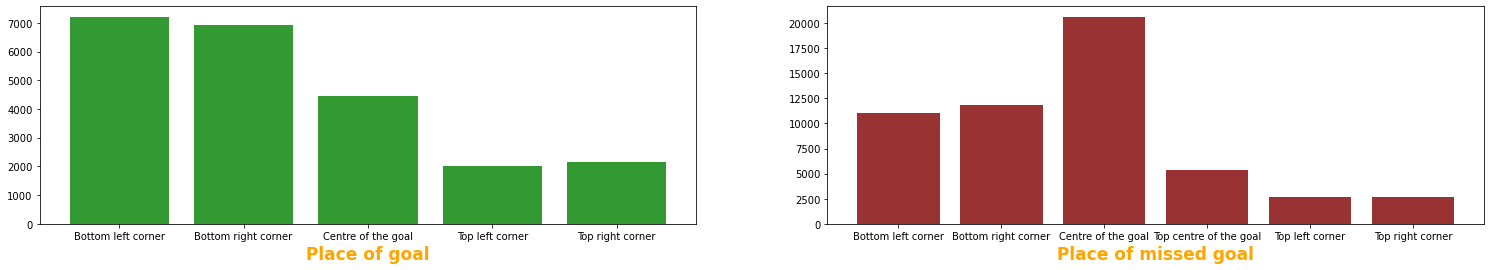

In [5]:
## Shot place goals
g_shot_place = pd.Series(['Bottom left corner','Bottom right corner','Centre of the goal','Top left corner','Top right corner'], index=[[item for item in range(1, 6)]])
## Shot place not goals
ng_shot_place = pd.Series(['Bottom left corner','Bottom right corner','Centre of the goal','Top centre of the goal','Top left corner','Top right corner'], index=[[item for item in range(1, 7)]])

on_target_attemps = events[(events.event_type == 1) & (events.shot_outcome == 1)]
goal_shot_places = on_target_attemps[(on_target_attemps.is_goal == 1)].iloc[:,[-8]].groupby('shot_place')['shot_place'].count()
not_goal_shot_places = on_target_attemps[(on_target_attemps.is_goal == 0)].iloc[:,[-8]].groupby('shot_place')['shot_place'].count()

plt.figure(figsize=(40, 4))
plt.subplot(131)
plt.bar(g_shot_place, goal_shot_places.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Place of goal',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(ng_shot_place, not_goal_shot_places.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Place of missed goal',fontweight='bold', color = 'orange', fontsize='17')
del g_shot_place
del ng_shot_place

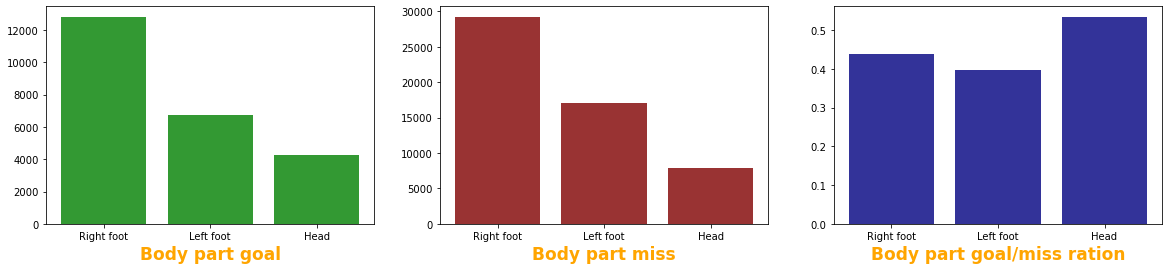

In [6]:
bodypart = pd.Series(['Right foot','Left foot','Head'], index=[[item for item in range(1, 4)]])
goal_bodypart = on_target_attemps[(on_target_attemps.is_goal == 1)].iloc[:,[-4]].groupby('bodypart')['bodypart'].count()
not_goal_bodypart = on_target_attemps[(on_target_attemps.is_goal == 0)].iloc[:,[-4]].groupby('bodypart')['bodypart'].count()
goal_bodypart/not_goal_bodypart

plt.figure(figsize=(20, 4))
plt.subplot(131)
plt.bar(bodypart, goal_bodypart.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Body part goal',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(bodypart, not_goal_bodypart.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Body part miss',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(133)
plt.bar(bodypart, (goal_bodypart/not_goal_bodypart).ravel(),color=(0.2,0.2,0.6,1))
plt.xlabel('Body part goal/miss ration',fontweight='bold', color = 'orange', fontsize='17')
del goal_bodypart
del not_goal_bodypart

In [7]:
leagues = pd.Series(['Bundesliga' , 'Premier League' , 'League 1', ' Serie A' , 'La Liga'], index=[[item for item in range(1, 6)]])
merge = events.merge(ginf, how="left");
fouls_per_league = merge[(merge.event_type == 3)].groupby('league')['league'].count()
cards_per_league = merge[(merge.event_type == 4) |(merge.event_type == 5) | (merge.event_type == 6)].groupby('league')['league'].count()
games_per_league = ginf.groupby('league')['league'].count()
fouls_per_game_per_league = fouls_per_league/games_per_league
cards_per_game_per_league = cards_per_league/games_per_league


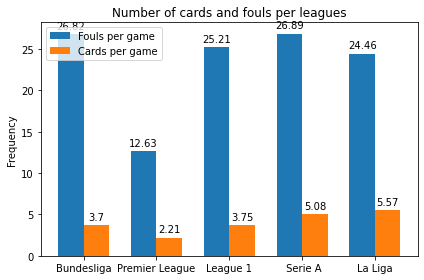

In [8]:

x = np.arange(len(leagues))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, fouls_per_game_per_league, width , label='Fouls per game')
rects2 = ax.bar(x + width/2, cards_per_game_per_league, width, label='Cards per game')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Frequency')
ax.set_title('Number of cards and fouls per leagues')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()
#delete
del fouls_per_game_per_league
del cards_per_game_per_league

[0 1 2 3 4]


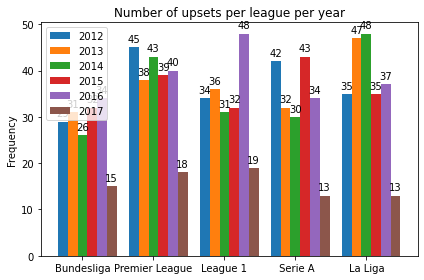

NameError: name 'upsets_both_to_score' is not defined

In [10]:
seasons = ['2012' , '2013' , '2014' , '2015' , '2016' , '2017'];

upsets = ginf[((ginf.fthg > ginf.ftag) & (ginf.odd_h/ginf.odd_a > 1.8)) | ((ginf.fthg < ginf.ftag) & (ginf.odd_a/ginf.odd_h > 1.8))]

upsets_both = ginf[(((ginf.fthg == 0) | (ginf.ftag == 0)) & (ginf.odd_bts_n/ginf.odd_bts > 1.2))]

x = np.arange(len(leagues))  # the label locations
print(x)
width = 0.55  # the width of the bars

fig, ax = plt.subplots()

i = 0
for season in seasons:
    upsets_per_season_per_league = upsets[upsets.season == int(season)].groupby('league')['league'].count()
    rects = ax.bar(x - width/2 + i*width/len(season) , upsets_per_season_per_league, width / len(season), label=season)
    autolabel(rects)
    i = i + 1
    
    
ax.set_ylabel('Frequency')
ax.set_title('Number of upsets per league per year')
ax.set_xticks(x)
ax.set_xticklabels(leagues)
ax.legend()

fig.tight_layout()

plt.show()
del upsets
del upsets_both_to_score

Text(0.5, 0, 'Average gouls per game')

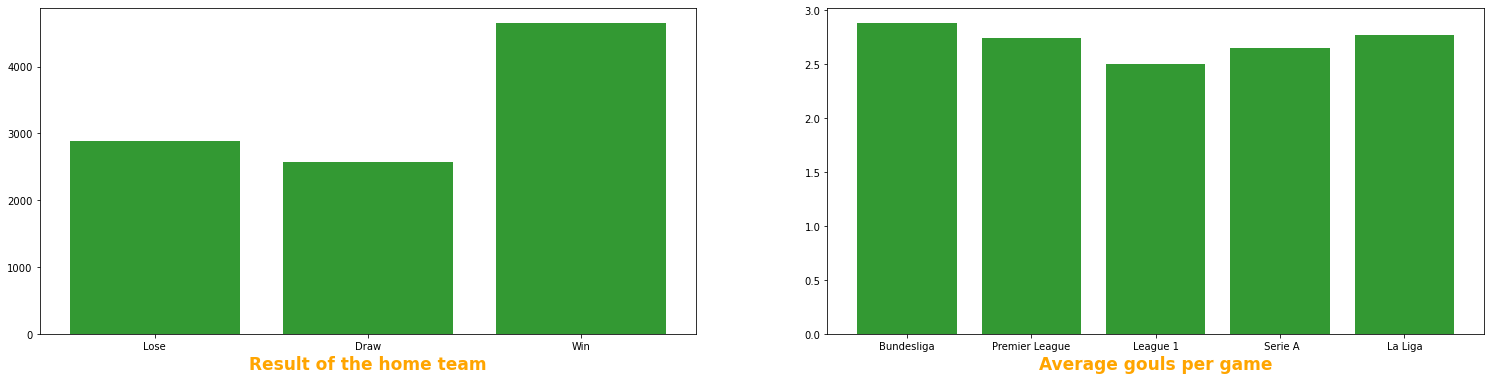

In [11]:
ginf_extra = ginf.copy()
ginf_extra['dif'] = ginf_extra['fthg'] - ginf_extra['ftag']
ginf_extra['total'] = ginf_extra['fthg'] + ginf_extra['ftag']

conditions = [ginf_extra['dif'] > 0 , ginf_extra['dif'] == 0, ginf_extra['dif'] < 0]
choices = [1 , 0 , -1]
ginf_extra['result'] = np.select(conditions,choices,default=np.nan)
homeResult = ginf_extra.groupby('result')['result'].count()

gouls_per_league_per_game = ginf_extra[['total','league']].groupby('league')['total'].sum()/games_per_league

results = ['Lose' , 'Draw' , 'Win']

plt.figure(figsize=(40, 6))
plt.subplot(131)
plt.bar(results, homeResult.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Result of the home team',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(leagues, gouls_per_league_per_game.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Average gouls per game',fontweight='bold', color = 'orange', fontsize='17')



In [12]:
shots = events[events.event_type == 1]

In [13]:
most_offensive_player = shots.groupby('player')['player'].count().sort_values(ascending = False)[:5]
most_scoring_player = shots[shots.is_goal == 1].groupby('player')['player'].count().where(lambda x : x>60).dropna().sort_values(ascending = False)
most_effective_player = (most_scoring_player/most_offensive_player.dropna()).sort_values(ascending = False)[:5]

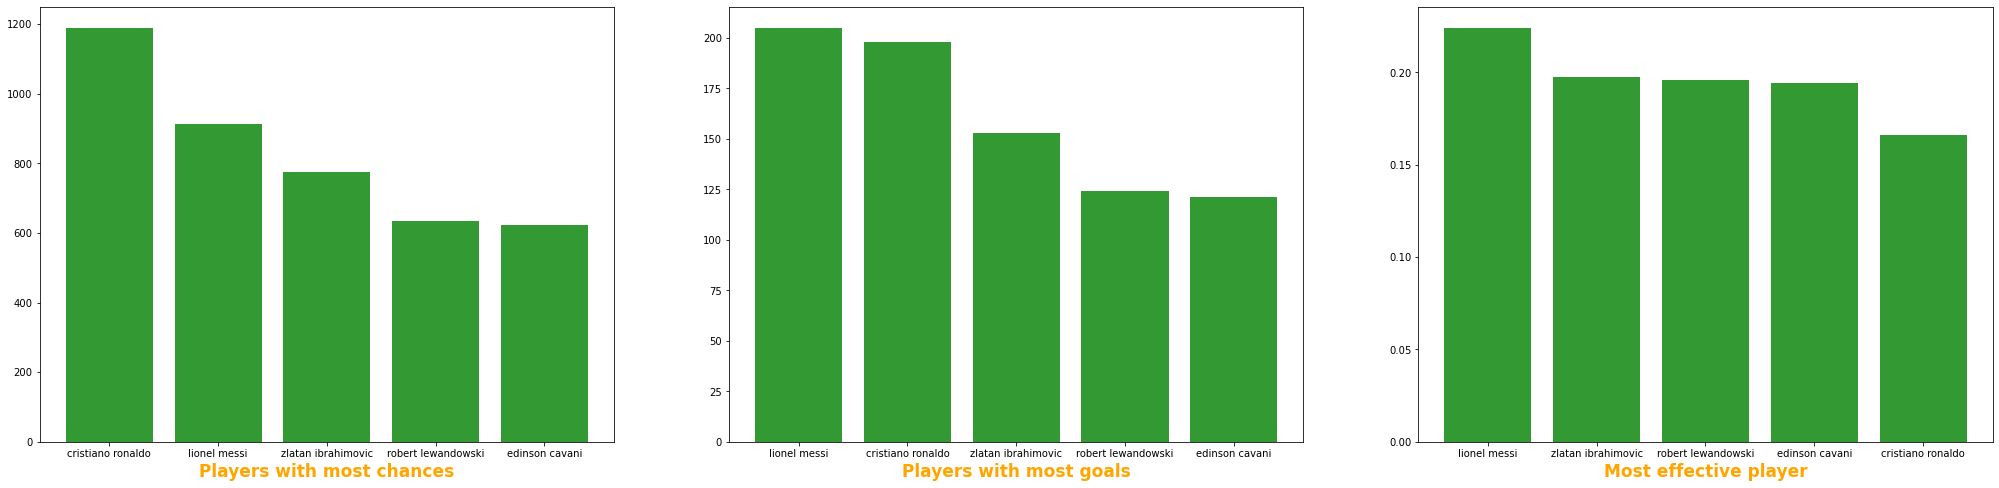

In [14]:

plt.figure(figsize=(35, 8))
plt.subplot(131)
plt.bar(most_offensive_player.index.values, most_offensive_player.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Players with most chances',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(132)
plt.bar(most_scoring_player[:5].index.values, most_scoring_player[:5].ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Players with most goals',fontweight='bold', color = 'orange', fontsize='17')
plt.subplot(133)
plt.bar(most_effective_player.index.values, most_effective_player.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Most effective player',fontweight='bold', color = 'orange', fontsize='17')

del most_offensive_player
del most_scoring_player
del most_effective_player

Text(0.5, 0, 'Moment of first goal')

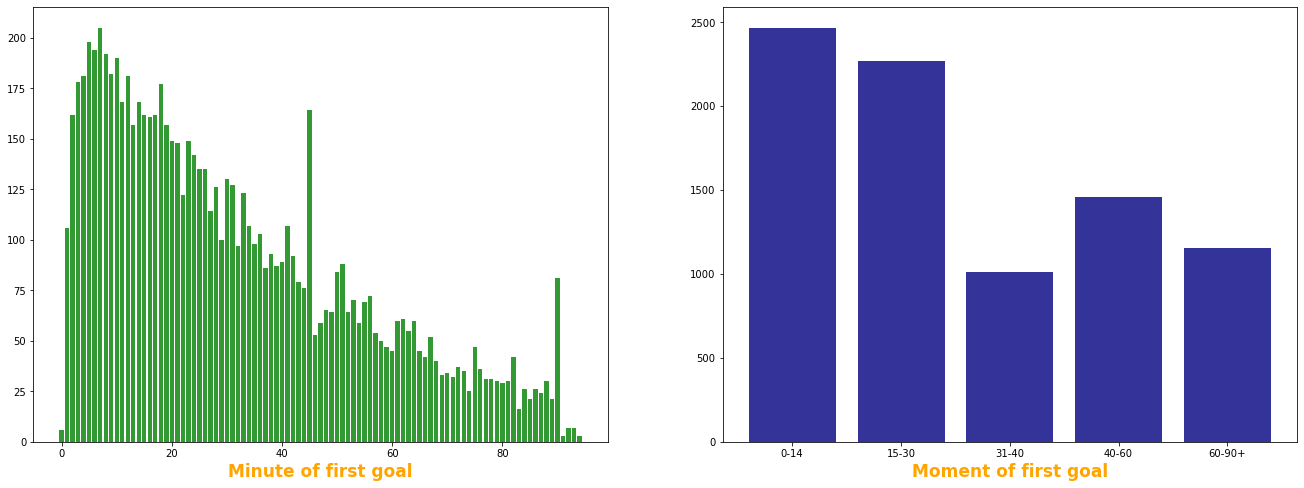

In [15]:
goals = events[(events.is_goal == 1)]
moments = goals.groupby("id_odsp").first()[['time']]
moments1 = moments.groupby("time")['time'].count()

plt.figure(figsize=(35, 8))
plt.subplot(131)
plt.bar(moments1.index.values, moments1.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Minute of first goal',fontweight='bold', color = 'orange', fontsize='17')

col = 'time'
conditions = [moments[col] < 15 , moments[col] <=30 , moments[col] <=40 , moments[col] <=60 , moments[col] > 60]
choices = [1 , 2 , 3, 4 , 5]
moments['time_moment'] = np.select(conditions,choices,default=np.nan)
moments = moments[['time_moment']].groupby("time_moment")['time_moment'].count()
moments

plt.subplot(132)
plt.bar(['0-14','15-30','31-40','40-60','60-90+'], moments.ravel(),color=(0.2,0.2,0.6,1))
plt.xlabel('Moment of first goal',fontweight='bold', color = 'orange', fontsize='17')


Text(0.5, 0, 'Minute of cards')

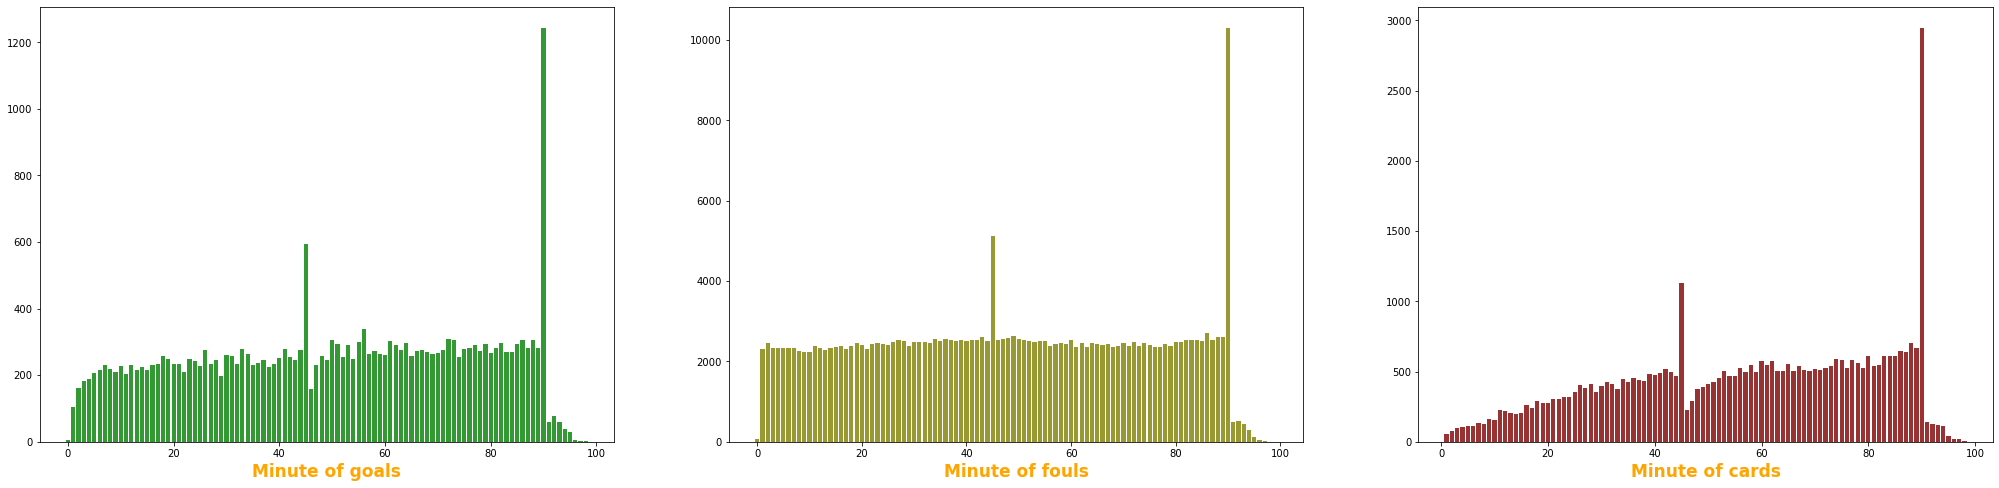

In [16]:
goals_minute = goals.groupby("time")['time'].count()

plt.figure(figsize=(35, 8))
plt.subplot(131)
plt.bar(goals_minute.index.values, goals_minute.ravel(),color=(0.2,0.6,0.2,1))
plt.xlabel('Minute of goals',fontweight='bold', color = 'orange', fontsize='17')

fouls = events[events.event_type == 3]
fouls_minute = fouls.groupby("time")['time'].count()

plt.subplot(132)
plt.bar(fouls_minute.index.values, fouls_minute.ravel(),color=(0.6,0.6,0.2,1))
plt.xlabel('Minute of fouls',fontweight='bold', color = 'orange', fontsize='17')

cards = events[(events.event_type == 4) | (events.event_type == 5) | (events.event_type == 6)]
cards_minute = cards.groupby("time")['time'].count()

plt.subplot(133)
plt.bar(cards_minute.index.values, cards_minute.ravel(),color=(0.6,0.2,0.2,1))
plt.xlabel('Minute of cards',fontweight='bold', color = 'orange', fontsize='17')

After an analysis over the dataset and an acknowkledge of the distribution, meaning and relations of its features has been done, the group decided to look with more detail into de following predictive problems:
* Predict the winning team
* Predict the moment of the first goal
* Predict whether both teams score
* Predict whether there will be more or less than 2.5 goals
* Predict whether an attemp will result in a save

These problems were choosen because ofthe existence of data and features alligned with the problem we are trying to build a model and predict and because of its meaning. The first 4 problems are classical betting options, where many people bet in these options. The last two problems rely on the prediction of whether an attemp will result in goal or not, also known as Expected Goals Model, or whether an attemp will result in a save or not, based in the previous model, allowing then to further data analysis about players and teams.

## 3. Problems

In this section it will be discussed the approach to each of the problems mentioned previously and an evaluation of the results obtain. There is a different approach to each of these problems given that they predict different features and different data can be extracted from each problem, which will be discussed. Several models were compared in order to find the one that fits better to a given problem.

In [17]:
#import necessary libraries
import pandas as pd
import numpy as np

from sklearn import preprocessing

import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,recall_score,precision_score, f1_score

In [18]:
#definition of useful methods
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def checkClf(name,clf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    #auc_roc = roc_auc_score(y_test, y_pred[:,1])
    #print('Our MLP classifier obtains an AUC-ROC of {:.4f}.'.format(auc_roc))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print("\n")

### 3.1 Predict the winning team

This problem is possibly the most known problem in any sports because it would be very valuable to know who the winner would be in a given match, whether for betting or for investimens, and so on. It is the most bet option because of its simplicity, only three simple options (Win, Draw, Lose) and meaning to thoose who bet. However it's results are very unpredictable and some would argue that they have some randomness associated, there are so many internal and external factors to take into account and even then no predictor would accurtly predict every game. A team that has won a game can, right after, in the next game, in the same stadium, against the same team, loose that game.

#### Approach

For this problem tha dataset consisted of the games played over the course of 5 years, between 2011/2012 until 2016/2017, of the five major european leagues, suming to a total of 10112 games. 
There are two necessary input features for this problem, the home team and the away team, in order to be able to predict who will win.
The output feature will be in order to the home team, representing the result of the home team, a Win means that the home team won, a Lose means that the home team lost. For this representation the output (Win, Draw,Lose) will be transformed into (1,0,-1), because it will be usefull for future use.

In [19]:
games = ginf[['ht','at','fthg','ftag']].copy()
games['result'] = games['fthg'] - games['ftag']

col = 'result'
conditions = [games[col] > 0 , games[col] == 0, games[col] < 0]
choices = [1 , 0 , -1]
games['result'] = np.select(conditions,choices,default=np.nan)
games.head()

,ht,at,fthg,ftag,result
0,Borussia Dortmund,Hamburg SV,3,1,1.0
1,FC Augsburg,SC Freiburg,2,2,0.0
2,Werder Bremen,Kaiserslautern,2,0,1.0
3,Paris Saint-Germain,Lorient,0,1,-1.0
4,Caen,Valenciennes,1,0,1.0


For an initial approach we will only take into account the home team and away team.
As we can see the **ht** and **at** features are categorical, so we need to convert them to binary dummies.

In [20]:
games = games[['ht','at','result']]
games_dummies = pd.get_dummies(games, columns=['ht','at'])
games_dummies.head()

,result,ht_AC Ajaccio,ht_AC Milan,ht_AJ Auxerre,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,ht_Almeria,ht_Angers,...,at_Valenciennes,at_VfB Stuttgart,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham,at_Wigan,at_Wolves
0,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


As we can see we end up to a total of 295 columns as part of the input and one for the output.
Next we will split the data into the training one and the test one, so we can train our model.

In [21]:
X = games_dummies.iloc[:,1:]
y = games_dummies.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
X_train

(10112, 295)
(10112,)


,ht_AC Ajaccio,ht_AC Milan,ht_AJ Auxerre,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,ht_Almeria,ht_Angers,ht_Arsenal,...,at_Valenciennes,at_VfB Stuttgart,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham,at_Wigan,at_Wolves
4786,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4916,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5204,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6043,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For training and tunning our models we will GridSearchCV, which will conduct an exaustive search over the hiperparameters and options specified, in order to find the best that fit our data.

In [22]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 'mlpclassifier__hidden_layer_sizes' : [(30,20,3) , (5,5,5,5,5)]}

models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 1000) , MLPhyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print("\n")

Model name: KNN
R2 score: -0.6567
Mean square error: 1.1850
F-measure: 0.5090
The accuracy of classifying is 50.904 %


Model name: SVC
R2 score: -0.6002
Mean square error: 1.1446
F-measure: 0.4986
The accuracy of classifying is 49.859 %


Model name: MLP
R2 score: -0.9545
Mean square error: 1.3980
F-measure: 0.4596
The accuracy of classifying is 45.960 %




The KNN model had the best accuracy, however it is not worth to dig into details because as we can see the previous data has very little features, only the teams that were playing against each other, so maybe with more input data our model can understand the data better and thus make better predictions. One important feature to join is the season, almost any team keeps its formation from 2011/2012 until 2016/2017, there player trades, the player improve or decline and even the coach changes, so adding the season can lead to result improvements. Furthermore, we have acess to the odds for each possible outcome before each match, odds take into account external factors that we don't have access, so it might be profitable to include that into our data set.

In [23]:
games_2 = ginf[['ht','at','fthg','ftag','season','odd_h','odd_d','odd_a']].copy()
games_2['result'] = games_2['fthg'] - games_2['ftag']

col = 'result'
conditions = [games_2[col] > 0 , games_2[col] == 0, games_2[col] < 0]
choices = [1 , 0 , -1]
games_2['result'] = np.select(conditions,choices,default=np.nan)

games_2 = games_2[['ht','at','result','season','odd_h','odd_d','odd_a']]
games_dummies_2 = pd.get_dummies(games_2, columns=['ht','at'])
X = games_dummies_2.iloc[:,1:]
y = games_dummies_2.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)
y

(10112, 299)
(10112,)


array([1., 0., 1., ..., 1., 0., 1.])

In [24]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 'mlpclassifier__hidden_layer_sizes' : [(30,20,3) , (5,5,5,5,5)]}

models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 800) , MLPhyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    print('The accuracy of classifying is {:.3f} %'.format(clf.score(X_test, y_test)*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")

Model name: KNN
R2 score: -0.5291
Mean square error: 1.0938
Precision: 0.5282
Recall: 0.5282
Accuracy: 0.5282
F-measure: 0.5282
The accuracy of classifying is 52.825 %
Confusion Matrix:
[[ 475   42  495]
 [ 219   58  624]
 [ 239   51 1337]]
Report:
              precision    recall  f1-score   support

        -1.0       0.51      0.47      0.49      1012
         0.0       0.38      0.06      0.11       901
         1.0       0.54      0.82      0.65      1627

    accuracy                           0.53      3540
   macro avg       0.48      0.45      0.42      3540
weighted avg       0.49      0.53      0.47      3540

{'kneighborsclassifier__n_neighbors': 101}


Model name: SVC
R2 score: -0.5208
Mean square error: 1.0879
Precision: 0.5105
Recall: 0.5105
Accuracy: 0.5105
F-measure: 0.5105
The accuracy of classifying is 51.045 %
Confusion Matrix:
[[ 455   97  460]
 [ 230   89  582]
 [ 246  118 1263]]
Report:
              precision    recall  f1-score   support

        -1.0       0.

c:\users\gustavo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For this next step, even though the Neural Network had a better accuracy it tent to overfit ignoring the least frequent output (draw), and had worse R2 and and square error. So we will choose the Suport Vector Machine and the KNeighbors for further comparision.

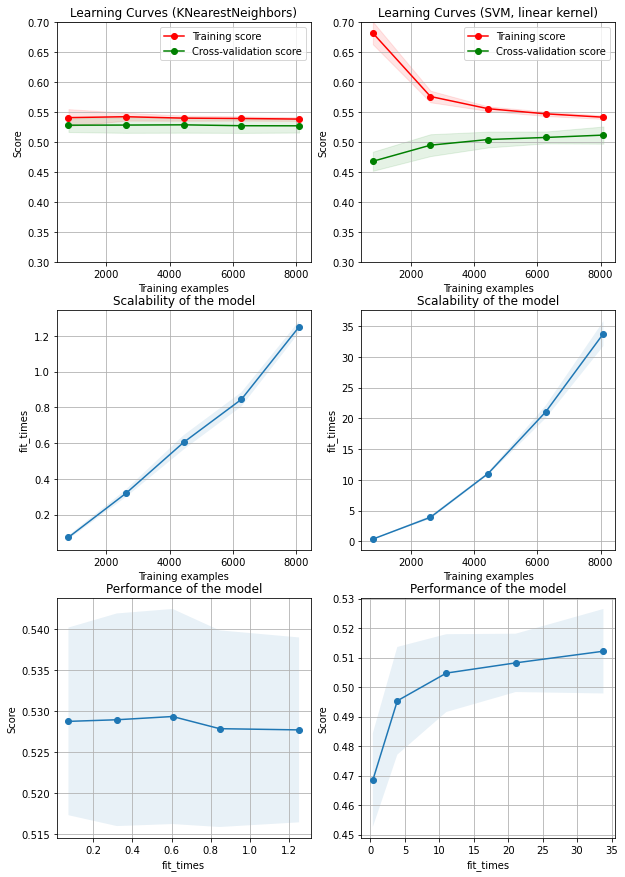

In [25]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (KNearestNeighbors)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors = 101)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.3, 0.7),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svm.SVC(kernel = 'linear')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.3, 0.7),
                    cv=cv, n_jobs=4)

plt.show()

As we can see the KNearestNeighbors behaved better in the overall dataset. And the SVN had the abilty to perform better given more data, however fot predicting the winning team we will stick with the KNN model that gave us, previously, a  52,852 % accuracy, which we agree is a decent score, given that the outcome is very random, and it is hard to train the model with data that has inherently noise.

### 3.2 Predict the moment of first goal

This problem consists of determining the moment of the first goal, which is also a rather random event because nothing but events during the game can help to determine when a goal will happen, like the number of previous attemps, how many players are in the field, but all this occurs during the game and we cannot know before hand, but even if we knew that, it is subject of luck and chance.

#### Approach

For this problem we will use the home team and the away team because more offensive or better teams are more likely to score sonner agains less defensive or weaker teams, to help clarify that and take into account external factors, the odds each possible outcome of the game (Win, Draw, Lose) will also be added.

In [26]:
goals = events[(events.is_goal == 1)]
moments = goals.merge(ginf, how="left").groupby("id_odsp").first()[['time','ht','at','side','odd_h','odd_d','odd_a']]
moments.head()

,time,ht,at,side,odd_h,odd_d,odd_a
id_odsp,,,,,,,
004f4ING/,82,Southampton,Swansea,2,1.68,4.05,6.50
00LMl81F/,17,AS Roma,AC Milan,2,3.15,3.29,2.60
00QH2XdM/,14,Stade de Reims,Evian Thonon Gaillard,1,2.25,3.35,4.25
00QL4t1L/,77,Borussia Dortmund,FC Ingolstadt 04,1,1.30,6.25,14.53
00WAhrVe/,28,Borussia Monchengladbach,Hamburg SV,2,1.82,4.30,5.30


Next, the time will be divided into 4 categories, the first moment, from the beggining of the game until the end of the minute 24, from the minute 25 to the end of the first half will be the second moment, the third moment will be from the beggining o the second half until the minute 60, and form then on it will be the fourth moment.

In [27]:
col = 'time'
conditions = [moments[col] < 15 , moments[col] <=30 , moments[col] <=40 , moments[col] <=60 , moments[col] > 60]
choices = [1 , 2 , 3, 4 , 5]
moments['time_moment'] = np.select(conditions,choices,default=np.nan)
moments = moments[['time_moment','ht','at','odd_h','odd_d','odd_a']]
moments

,time_moment,ht,at,odd_h,odd_d,odd_a
id_odsp,,,,,,
004f4ING/,5.0,Southampton,Swansea,1.68,4.05,6.50
00LMl81F/,2.0,AS Roma,AC Milan,3.15,3.29,2.60
00QH2XdM/,1.0,Stade de Reims,Evian Thonon Gaillard,2.25,3.35,4.25
00QL4t1L/,5.0,Borussia Dortmund,FC Ingolstadt 04,1.30,6.25,14.53
00WAhrVe/,2.0,Borussia Monchengladbach,Hamburg SV,1.82,4.30,5.30
...,...,...,...,...,...,...
zyEQMq2D/,2.0,Real Sociedad,Sevilla,2.26,3.65,3.65
zyJsFDYG/,4.0,Hannover 96,VfL Wolfsburg,2.44,3.54,3.20
zyKwAQxf/,3.0,Celta Vigo,Malaga,1.68,4.35,6.00


Next we will turn our categorical data into binary dummies, so our models can understand them.

In [28]:

moments_dummies_2 = pd.get_dummies(moments, columns=['ht','at'])
X = moments_dummies_2.iloc[:,1:]
y = moments_dummies_2.iloc[:,:1].values.ravel()
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1,stratify=y)

(8360, 287)
(8360,)


In this section several classifiers will be tested with several hyperparameters in order to find the best one. It was not possible to do a training with Grid Search with Cross Validation because of the time complexety associated and the group decided to take more manual approach that gave us the following results.

In [29]:
checkClf('KNN_21',KNeighborsClassifier(n_neighbors=21))
checkClf('KNN_25',KNeighborsClassifier(n_neighbors=25))
checkClf('KNN_31',KNeighborsClassifier(n_neighbors=31))
checkClf('KNN_35',KNeighborsClassifier(n_neighbors=35))
checkClf('SVC' , svm.SVC(gamma = 'scale', kernel = 'rbf'))
checkClf('RFC_5' , RandomForestClassifier(n_estimators=5))
checkClf('RFC_10' , RandomForestClassifier(n_estimators=10))
checkClf('RFC_20' , RandomForestClassifier(n_estimators=20))
checkClf('MLP' , MLPClassifier(max_iter = 4000,solver='sgd',hidden_layer_sizes=(10,5,5,5,5)))
checkClf('CNB' , CategoricalNB())

Model name: KNN_21
F-measure: 0.2772
The accuracy of classifying is 27.717 %
Confusion Matrix:
[[432 313  22  69  28]
 [394 297  16  56  31]
 [170 131   8  30  15]
 [246 183   8  48  26]
 [200 132   7  38  26]]
Report:
              precision    recall  f1-score   support

         1.0       0.30      0.50      0.37       864
         2.0       0.28      0.37      0.32       794
         3.0       0.13      0.02      0.04       354
         4.0       0.20      0.09      0.13       511
         5.0       0.21      0.06      0.10       403

    accuracy                           0.28      2926
   macro avg       0.22      0.21      0.19      2926
weighted avg       0.24      0.28      0.24      2926



Model name: KNN_25
F-measure: 0.2755
The accuracy of classifying is 27.546 %
Confusion Matrix:
[[435 317  16  67  29]
 [398 301  14  56  25]
 [180 127   8  29  10]
 [256 189   5  40  21]
 [215 126   6  34  22]]
Report:
              precision    recall  f1-score   support

         1.0    

c:\users\gustavo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model name: RFC_5
F-measure: 0.2474
The accuracy of classifying is 24.744 %
Confusion Matrix:
[[376 265  66 103  54]
 [347 234  61  95  57]
 [145 114  34  36  25]
 [255 133  34  44  45]
 [182 112  25  48  36]]
Report:
              precision    recall  f1-score   support

         1.0       0.29      0.44      0.35       864
         2.0       0.27      0.29      0.28       794
         3.0       0.15      0.10      0.12       354
         4.0       0.13      0.09      0.11       511
         5.0       0.17      0.09      0.12       403

    accuracy                           0.25      2926
   macro avg       0.20      0.20      0.19      2926
weighted avg       0.22      0.25      0.23      2926



Model name: RFC_10
F-measure: 0.2570
The accuracy of classifying is 25.701 %
Confusion Matrix:
[[358 262  76 111  57]
 [336 252  65  98  43]
 [146 114  28  40  26]
 [214 144  42  64  47]
 [165 103  29  56  50]]
Report:
              precision    recall  f1-score   support

         1.0     

c:\users\gustavo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model name: CNB
F-measure: 0.2573
The accuracy of classifying is 25.735 %
Confusion Matrix:
[[339 341  28  93  63]
 [318 305  20  92  59]
 [150 135   6  40  23]
 [204 191  10  63  43]
 [169 142   3  49  40]]
Report:
              precision    recall  f1-score   support

         1.0       0.29      0.39      0.33       864
         2.0       0.27      0.38      0.32       794
         3.0       0.09      0.02      0.03       354
         4.0       0.19      0.12      0.15       511
         5.0       0.18      0.10      0.13       403

    accuracy                           0.26      2926
   macro avg       0.20      0.20      0.19      2926
weighted avg       0.23      0.26      0.23      2926





From the previous data we can see that Support Vector Machine had a better accuracy, however it was overfit and and could only predict the most frequent moment, the first one, thus it had a worse f1 score over all the categories, so we choose the KNeighbors with 35 neighbors and the Random Forest with 10 estimators for further comparisons, because they show good f1 measure and do not overfit into one category.

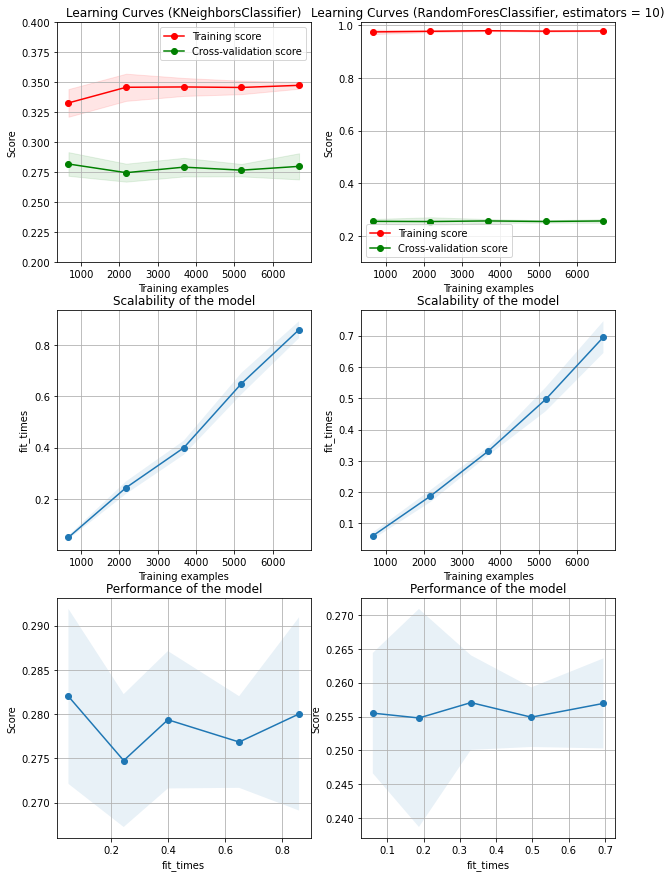

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (KNeighborsClassifier, n_neighbors=31)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = KNeighborsClassifier(n_neighbors=31)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.2, 0.4),
                    cv=cv, n_jobs=4)

title = "Learning Curves (RandomForesClassifier, estimators = 10)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = RandomForestClassifier(n_estimators=10)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.1, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

The Random Forest Classifier rapidly overfits to the training data, existing a huge difference between the training score (very high) and the cross-validation score (rather low), whereas the KNieighbours has a much smaller difference and achieves a higher CV-score, so for this models we will stick with KNeighbors 

### 3.3 Predict whether both teams score
In this problem we will try to predict whether both score at least a goal during the entire game. This event is more likely the more agressive and less defensive the both teams are, leading to higher chances of goals from the both teams. However, a team can score many goals in one game and right in the next do not score at all.
#### Approach

There are two principal input features, the home team and the away team. To complement this feature we will be adding the odd for both teams to score and for both teams to score, which reflect the previsions of people betting and takes into account external factors. Furthermore, we will add the odd over and odd under 2.5 goals, because when the total of goals in a game is high, is more likely to both teams to score. The problem with this choice of input features is that only about 10% of all game data have the previously mentioned odds informatation, so for the sake of this problem our data will only contain games with full information about the odds of each possible outcome.

In [37]:
selected = ginf[ginf.odd_bts.notnull() & ginf.odd_bts_n.notnull()][['fthg','ftag','ht','at','odd_over','odd_under','odd_bts','odd_bts_n']].copy()
selected['both_to_score'] = 0;
conditions = [selected['fthg'] == 0 , selected['ftag'] == 0 , 1 == 1]
choices = ['no','no','yes']
selected['both_to_score'] = np.select(conditions,choices,default=np.nan)
selected = selected[['both_to_score','ht','at','odd_over','odd_under','odd_bts','odd_bts_n']]
selected = pd.get_dummies(selected, columns=['ht','at'])
selected.head()

,both_to_score,odd_over,odd_under,odd_bts,odd_bts_n,ht_AC Milan,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,...,at_Toulouse,at_US Pescara,at_Udinese,at_Valencia,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham
9135,no,1.92,2.12,2.25,1.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9136,yes,2.14,1.83,2.05,1.93,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9137,yes,2.28,1.78,1.95,2.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9138,yes,2.15,1.84,2.05,1.93,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9139,no,2.80,1.53,2.40,1.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Here we split our processed data into training and testing sets with a test size of 35% of the overall data.

In [38]:
X = selected.iloc[:,1:]
y = selected.iloc[:,:1]
y = np.ravel(y)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=1)

(977, 200)
(977,)


In this section we will do a Grid Search with Cross Validation in order to exaustably check which model with which hyperparameters adapts better to our dataset.

In [39]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [15,35,41,69,77,101],
                      'kneighborsclassifier__weights' : ['uniform','distance']}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf','poly','sigmoid'],
                      'svc__gamma' : ['auto','scale'],
                      'svc__C':[0.8,0.9,0.99,1.0,1.01,1.1],
                      'svc__shrinking':[True, False]}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 
                      'mlpclassifier__hidden_layer_sizes' : [(30,20,10,5,2) , (5,5,5,5,5),(20,20),(20,5)]}
RFThyperparameters = {'randomforestclassifier__n_estimators' : [5,15,20,35,40,45,60]}
GPChyperparameters = {'gaussianprocessclassifier__warm_start' : [True,False] , 
                      'gaussianprocessclassifier__n_restarts_optimizer' : [0,1,2,4,5] , 
                      'gaussianprocessclassifier__max_iter_predict' : [50,100,200,400]}

models.append(('GPC' , GaussianProcessClassifier() , GPChyperparameters ))
models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 4000) , MLPhyperparameters ))
models.append(('RFT' , RandomForestClassifier() , RFThyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    acc = clf.score(X_test, y_test)
    print('The accuracy of classifying is {:.3f} %'.format(acc*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")

Model name: GPC
F-measure: 0.5351
The accuracy of classifying is 53.509 %
Confusion Matrix:
[[ 68  92]
 [ 67 115]]
Report:
              precision    recall  f1-score   support

          no       0.50      0.42      0.46       160
         yes       0.56      0.63      0.59       182

    accuracy                           0.54       342
   macro avg       0.53      0.53      0.53       342
weighted avg       0.53      0.54      0.53       342

{'gaussianprocessclassifier__max_iter_predict': 50, 'gaussianprocessclassifier__n_restarts_optimizer': 0, 'gaussianprocessclassifier__warm_start': True}


Model name: KNN
F-measure: 0.5439
The accuracy of classifying is 54.386 %
Confusion Matrix:
[[ 58 102]
 [ 54 128]]
Report:
              precision    recall  f1-score   support

          no       0.52      0.36      0.43       160
         yes       0.56      0.70      0.62       182

    accuracy                           0.54       342
   macro avg       0.54      0.53      0.52       342


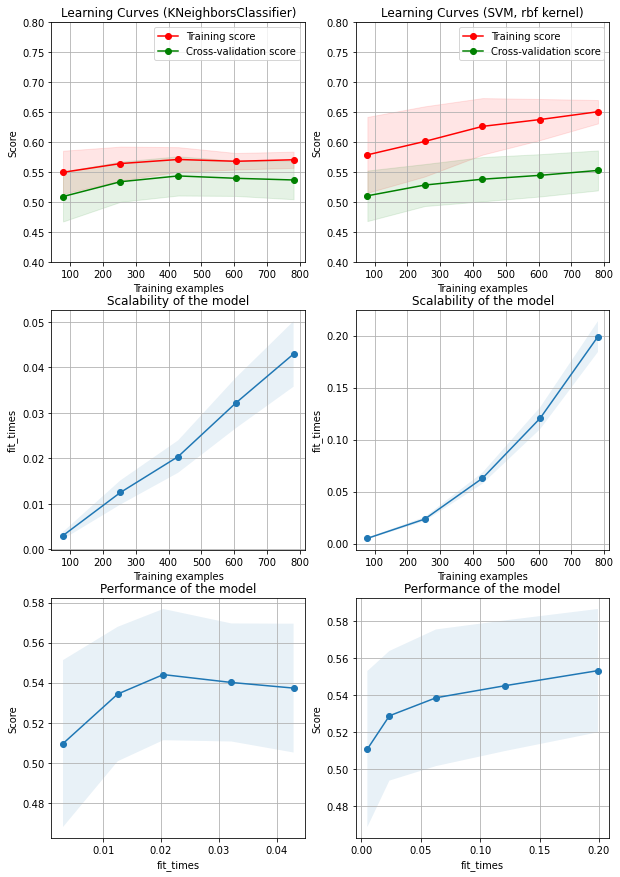

In [40]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (KNeighborsClassifier)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = KNeighborsClassifier(n_neighbors = 77,weights = 'uniform')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.4, 0.8),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, rbf kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = svm.SVC(gamma = 'scale', kernel = 'rbf',C = 0.9,shrinking = True)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.4, 0.8),
                    cv=cv, n_jobs=4)


plt.show()

In this problem we can see that KNeighbors rapidly reach a point where its accuracy no longer gets better, however we can see that Support Vector Machine would beneficiate from more data and even then it achieve a better cross-validation score that the previous model. So for this problem we can achive a accuracy of about 55%, when it comes to predict whether both teams score.

### 3.4 Predict the whether there will be more or less than 2.5 goals
This problem cosists of predicting whether both teams will score a total of more or less than 2.5 goals.
For this problem tha dataset consisted of the games played over the course of 5 years, between 2011/2012 until 2016/2017, of the five major european leagues, suming to a total of 10112 games. 
#### Approach

There are two mandatory input features for this problem, the home team and the away team, so we can estimate how offensive and defensive each team is and thus predict if the total of goals scored will be greater than 2.5 or not. Unlike the previous problem, the season of the game will not be included because it had redundancy to the data and we actually got worse score when the season was included than without it. Two relevant features that would make our model better would be, firstly, the odds of each result, because it takes into account external factors not covered by this dataset, and, secondly, the odds of both teams score, because this taken into account the agreesive/offensive part of each team, the only problem is that only 10% of the games have this information, so for the sake of this problem our data will only contain games with full information about the odds of each possible outcome.

In [41]:
selected = ginf[ginf.odd_over.notnull() & ginf.odd_under.notnull()][['fthg','ftag','ht','at','season','odd_over','odd_under','odd_bts','odd_bts_n']].copy()
selected.head()

,fthg,ftag,ht,at,season,odd_over,odd_under,odd_bts,odd_bts_n
9135,0,1,Bastia,Paris Saint-Germain,2017,1.92,2.12,2.25,1.74
9136,2,2,AS Monaco,Guingamp,2017,2.14,1.83,2.05,1.93
9137,3,2,Caen,Lorient,2017,2.28,1.78,1.95,2.02
9138,1,1,Southampton,Watford,2017,2.15,1.84,2.05,1.93
9139,1,0,Montpellier,Angers,2017,2.80,1.53,2.40,1.70


In this next section we will process the data in order create a new column that will contain the information of whether a games result in under or over 2.5 goals. The output will take form of (0,1) corresponding to (**under**, **over**).

In [42]:
selected['total'] = selected['fthg'] + selected['ftag']

col = 'total'
conditions = [selected[col] < 2.5 , selected[col] > 2.5]
choices = ['0','1']
selected['total'] = np.select(conditions,choices,default=np.nan)
selected = selected.iloc[:,2:]
selected = selected[['total','ht','at','odd_over','odd_under','odd_bts','odd_bts_n']]
selected

,total,ht,at,odd_over,odd_under,odd_bts,odd_bts_n
9135,0,Bastia,Paris Saint-Germain,1.92,2.12,2.25,1.74
9136,1,AS Monaco,Guingamp,2.14,1.83,2.05,1.93
9137,1,Caen,Lorient,2.28,1.78,1.95,2.02
9138,0,Southampton,Watford,2.15,1.84,2.05,1.93
9139,0,Montpellier,Angers,2.80,1.53,2.40,1.70
...,...,...,...,...,...,...,...
10107,1,Genoa,Crotone,1.95,2.03,2.03,1.86
10108,0,Chelsea,Hull,1.54,2.68,2.40,1.66
10109,1,AS Monaco,Lorient,1.53,3.08,1.80,2.25
10110,0,Real Betis,Sporting Gijon,2.20,1.89,2.05,1.86


Next, we will transform each categorical data, home team and away team, into binary dummies, so that our models can handle them accuretly.

In [43]:
data = pd.get_dummies(selected,columns=['ht','at'])
data

,total,odd_over,odd_under,odd_bts,odd_bts_n,ht_AC Milan,ht_AS Monaco,ht_AS Nancy Lorraine,ht_AS Roma,ht_Alaves,...,at_Toulouse,at_US Pescara,at_Udinese,at_Valencia,at_VfL Wolfsburg,at_Villarreal,at_Watford,at_Werder Bremen,at_West Brom,at_West Ham
9135,0,1.92,2.12,2.25,1.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9136,1,2.14,1.83,2.05,1.93,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9137,1,2.28,1.78,1.95,2.02,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9138,0,2.15,1.84,2.05,1.93,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9139,0,2.80,1.53,2.40,1.70,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10107,1,1.95,2.03,2.03,1.86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10108,0,1.54,2.68,2.40,1.66,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10109,1,1.53,3.08,1.80,2.25,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10110,0,2.20,1.89,2.05,1.86,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After the data has been processed we will then define our training and testing set. The testing set will have a size of 25% of the total dataset.

In [44]:
data = data.replace(np.nan, 0)
X = data.iloc[:,1:]
y = data.iloc[:,:1]
y = np.ravel(y)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

(977, 200)
(977,)


From this we will conduct a research thourgh different models and different hyperparameters of each model using a Grid Search with Cross-Validation in order to see which estimators fit better to our dataset.

In [45]:
models = []

KNNhyperparameters = {'kneighborsclassifier__n_neighbors' : [41,81, 101]}
SVMhyperparameters = {'svc__kernel' : ['linear','rbf','poly','sigmoid'],
                      'svc__gamma' : ['auto','scale']}
MLPhyperparameters = {'mlpclassifier__solver' : ['adam','sgd'] , 
                      'mlpclassifier__hidden_layer_sizes' : [(30,20,10,5,2) , (5,5,5,5,5)]}
RFThyperparameters = {'randomforestclassifier__n_estimators' : [50,100,200]}
GPChyperparameters = {'gaussianprocessclassifier__warm_start' : [True,False] , 
                      'gaussianprocessclassifier__n_restarts_optimizer' : [0,1,2,4,5] , 
                      'gaussianprocessclassifier__max_iter_predict' : [50,100,200,400]}

models.append(('GPC' , GaussianProcessClassifier() , GPChyperparameters ))
models.append(('KNN' , KNeighborsClassifier(), KNNhyperparameters))
models.append(('SVC' , svm.SVC(), SVMhyperparameters))
models.append(('MLP' , MLPClassifier(max_iter = 4000) , MLPhyperparameters ))
models.append(('RFT' , RandomForestClassifier() , RFThyperparameters ))

for name, model, hyper in models:
    pipeline = make_pipeline(model)
    clf = GridSearchCV(pipeline, hyper)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Model name: " + name)
    #print("R2 score: {:.4f}".format(r2_score(y_test, y_pred)))
    #print("Mean square error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
    #print('Precision: {:.4f}'.format(precision_score(y_test, y_pred, average='micro')))
    #print('Recall: {:.4f}'.format(recall_score(y_test, y_pred, average='micro')))
    #print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('F-measure: {:.4f}'.format(f1_score(y_test, y_pred, average='micro')))
    acc = clf.score(X_test, y_test)
    print('The accuracy of classifying is {:.3f} %'.format(acc*100))
    print('Confusion Matrix:')
    print(confusion_matrix(y_test,y_pred))
    print('Report:')
    print(classification_report(y_test,y_pred))
    print(clf.best_params_)
    print("\n")

Model name: GPC
F-measure: 0.5959
The accuracy of classifying is 59.592 %
Confusion Matrix:
[[57 62]
 [37 89]]
Report:
              precision    recall  f1-score   support

           0       0.61      0.48      0.54       119
           1       0.59      0.71      0.64       126

    accuracy                           0.60       245
   macro avg       0.60      0.59      0.59       245
weighted avg       0.60      0.60      0.59       245

{'gaussianprocessclassifier__max_iter_predict': 50, 'gaussianprocessclassifier__n_restarts_optimizer': 0, 'gaussianprocessclassifier__warm_start': True}


Model name: KNN
F-measure: 0.5673
The accuracy of classifying is 56.735 %
Confusion Matrix:
[[45 74]
 [32 94]]
Report:
              precision    recall  f1-score   support

           0       0.58      0.38      0.46       119
           1       0.56      0.75      0.64       126

    accuracy                           0.57       245
   macro avg       0.57      0.56      0.55       245
weighted

c:\users\gustavo\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model name: RFT
F-measure: 0.5388
The accuracy of classifying is 53.878 %
Confusion Matrix:
[[67 52]
 [61 65]]
Report:
              precision    recall  f1-score   support

           0       0.52      0.56      0.54       119
           1       0.56      0.52      0.53       126

    accuracy                           0.54       245
   macro avg       0.54      0.54      0.54       245
weighted avg       0.54      0.54      0.54       245

{'randomforestclassifier__n_estimators': 200}




From this, we can conclude that Gaussian Process Classifier and Suport Vector Machine classifier have the best results, so we will look with more detail into this two. The both have an accuracy of predicting whether there will be more or less than 2.5 goals with close to 60%.

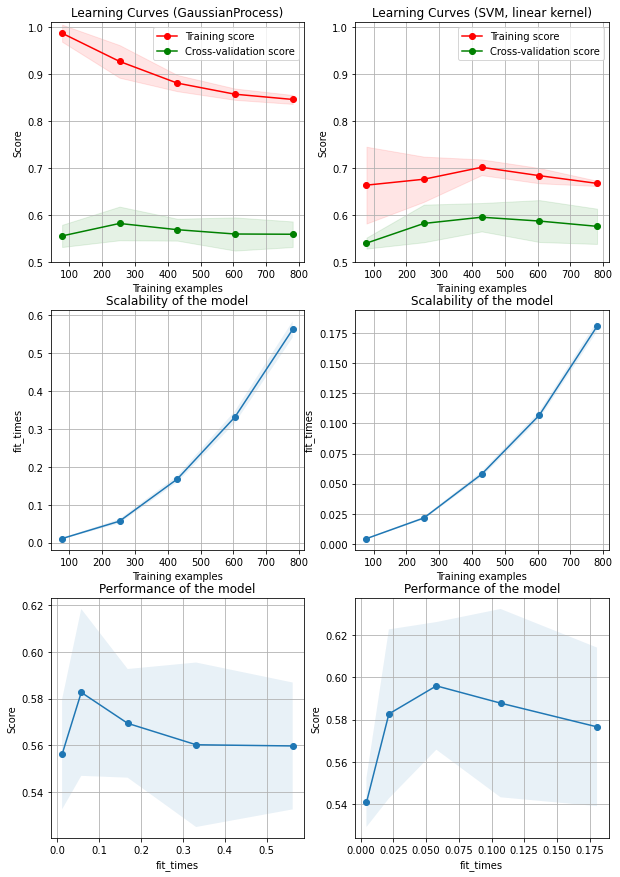

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))


title = "Learning Curves (GaussianProcess)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

estimator = GaussianProcessClassifier(max_iter_predict = 50, n_restarts_optimizer = 0, warm_start = True)
plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

title = r"Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = svm.SVC(gamma = 'scale', kernel = 'rbf')
plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4)

plt.show()

### 3.5 Predict whether an attemp will result in a save
#### Approach

#### Experimental Evaluation

## 4. Conclusion

## References